In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pydotplus 
from IPython.display import Image  
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [54]:
df = pd.read_csv("child_labor.csv")

In [3]:
gdp = pd.read_csv("gdp.csv")

In [41]:
df.head()

Country               Good Child Labor Forced Labor
0  Afghanistan             Bricks           X            X
1  Afghanistan            Carpets           X          NaN
2  Afghanistan               Coal           X          NaN
3  Afghanistan  Flowers (poppies)           X          NaN
4       Angola           Diamonds           X            X

In [59]:
gdp.head()

Unnamed: 0     2016     2017     2018     2019     2020  \
0           0   18.395   19.290   20.604   22.297   24.222   
1           1   12.144   12.876   13.764   14.813   15.997   
2           2  168.318  178.431  184.189  189.297  195.367   
3           3   91.939  102.315  108.588  114.449  120.822   
4           4    1.303    1.358    1.429    1.505    1.585   

             countries  
0          Afghanistan  
1              Albania  
2              Algeria  
3               Angola  
4  Antigua and Barbuda

# Understanding our data

Some definitions in this data set:

**Child Labor** refers to child slavery.

**Forced Labor** refers to adult slavery.
First, we will engage in some simple explanatory analysis.

Let's see how many instances of Child Labor there are as a proportion of the countries surveyed.

## Child Labor

In [32]:
child_labor = pd.DataFrame()
countries = list(set(df['Country']))
for country in countries:
    tmp_df = df[df['Country'] == country]
    num_child_produced = len(tmp_df[tmp_df["Child Labor"] == 'X'])
    child_labor = child_labor.append({
        "Country": country,
        "num_child_produced": num_child_produced
    }, ignore_index=True)

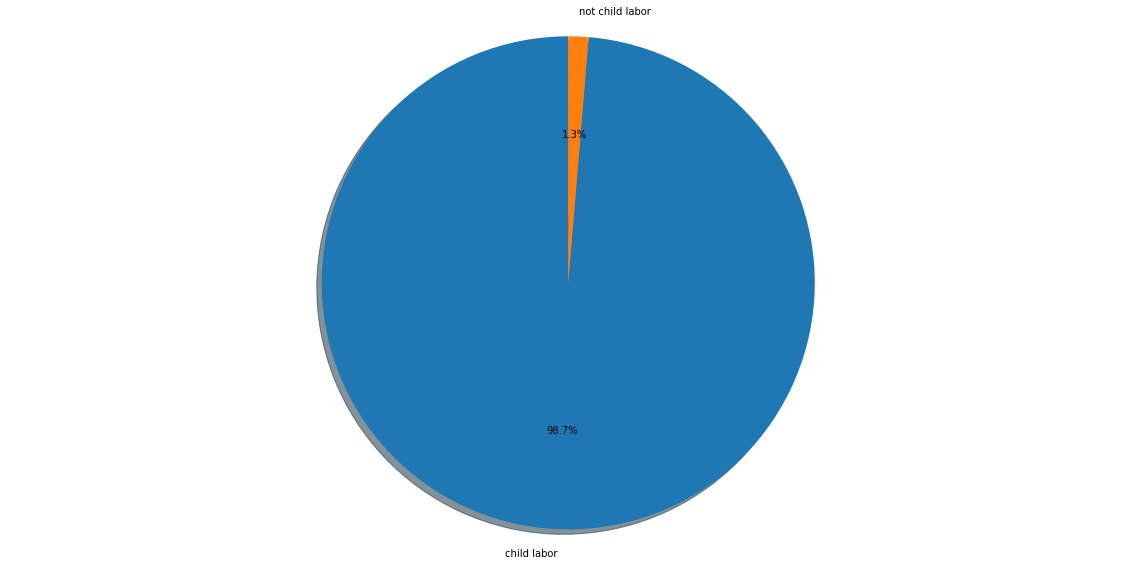

In [33]:
labels = 'child labor', 'not child labor'
countries_with_child_labor = len(child_labor[child_labor['num_child_produced'] > 0])
countries_without_child_labor = len(child_labor[child_labor['num_child_produced'] == 0])
sizes = [countries_with_child_labor, countries_without_child_labor]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

So, as we can see, 98.7% of all countries surveyed have some form of child labor.

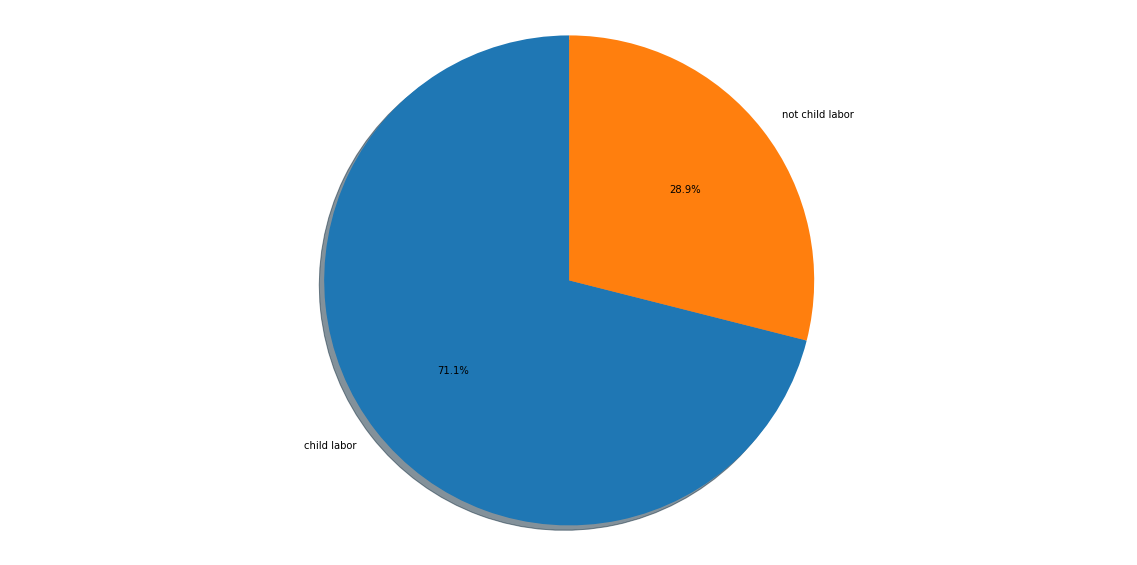

In [34]:
labels = 'child labor', 'not child labor'
more_than_one_industry = len(child_labor[child_labor['num_child_produced'] > 1])
one_or_fewer_industries = len(child_labor[child_labor['num_child_produced'] <= 1])
sizes = [more_than_one_industry, one_or_fewer_industries]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

And 71.1% have more than one industry where child labor is used.

## Forced Labor

In [42]:
forced_labor = pd.DataFrame()
countries = list(set(df['Country']))
for country in countries:
    tmp_df = df[df['Country'] == country]
    num_forced_produced = len(tmp_df[tmp_df["Forced Labor"] == 'X'])
    forced_labor = forced_labor.append({
        "Country": country,
        "num_forced_produced": num_forced_produced
    }, ignore_index=True)

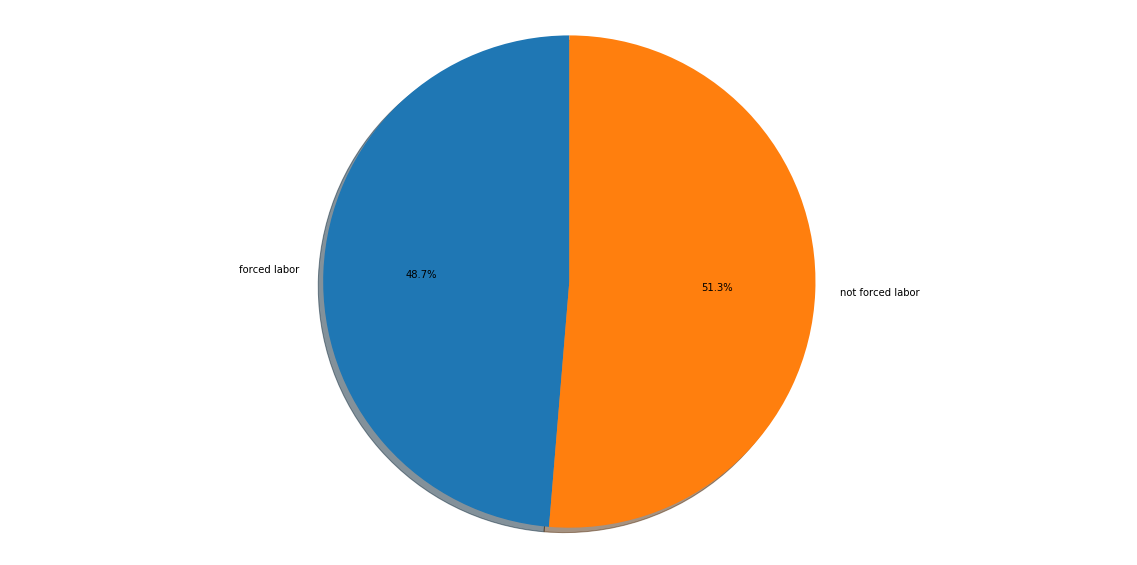

In [43]:
labels = 'forced labor', 'not forced labor'
countries_with_forced_labor = len(forced_labor[forced_labor['num_forced_produced'] > 0])
countries_without_forced_labor = len(forced_labor[forced_labor['num_forced_produced'] == 0])
sizes = [countries_with_forced_labor, countries_without_forced_labor]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

So, as we can see, 48.7% of all countries surveyed have some form of forced labor.

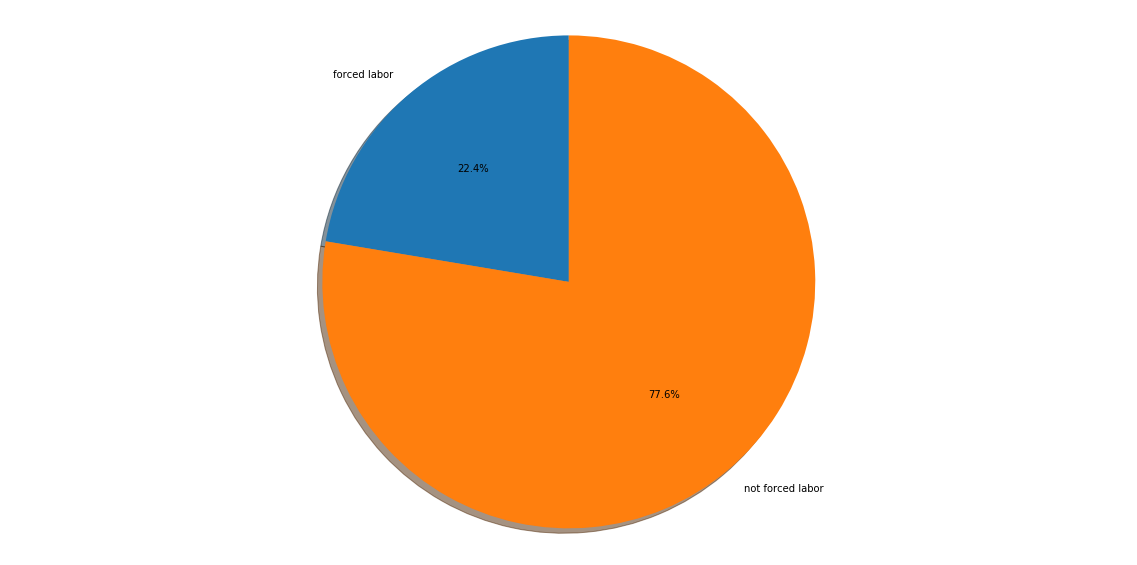

In [44]:
labels = 'forced labor', 'not forced labor'
more_than_one_industry = len(forced_labor[forced_labor['num_forced_produced'] > 1])
one_or_fewer_industries = len(forced_labor[forced_labor['num_forced_produced'] <= 1])
sizes = [more_than_one_industry, one_or_fewer_industries]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

And 22.4% have more than one industry where forced labor is used.

In [55]:
gems = ['Diamonds', 'Emeralds', 'Gems', 'Jade', 'Rubies', 'Sapphires', 'Tanzanite (gems)']
minerals = ['Zinc, ''Wolframite (tungsten ore)', 'Trona (mineral)', 'Silver',
           'Iron', 'Heterogenite (cobalt ore)', 'Gypsum (mineral)', 'Granite (crushed)',
           'Granite', 'Gold', 'Coltan (tantalum ore)', 'Copper', 'Cassiterite (tin ore)', 
            'Fluorspar (mineral)', 'Tin', 'Zinc', 'Wolframite (tungsten ore)', 'Gravel (crushed stones)']
food_related = ['Alcoholic Beverages', 'Baked Goods', 'Bananas',
               'Beans (green beans)', 'Beans (green, soy, yellow)',
               'Beef', 'Blueberries', 'Brazil Nuts/Chestnuts',
               'Broccoli', 'Cashews', 'Chile Peppers', 'Citrus Fruits',
               'Cloves', 'Coca (stimulant plant)', 'Cocoa', 
               'Coconuts', 'Coffee', 'Corn', 'Cucumbers', 'Cumin',
               'Dried Fish', 'Eggplants', 'Fish', 'Garlic', 'Grapes',
               'Goats', 'Hazelnuts', 'Hogs', 'Lobsters', 'Meat',
               'Melons', 'Miraa (stimulant plant)', 'Olives',
               'Onions', 'Peanuts', 'Pepper', 'Physic Nuts/Castor Beans',
               'Potatoes', 'Poultry', 'Pulses (legumes)', 'Rice', 'Salt',
               'Sesame', 'Shellfish', 'Shrimp', 'Strawberries', 'Sugar Beets',
               'Sugarcane', 'Tea', 'Tomatoes', 'Vanilla', 'Wheat', 'Yerba Mate (stimulant plant)',
               'Nile Perch (fish)', 'Pineapples', 'Tilapia (fish)', 'Cattle', 'Oil (Palm)',
               'Oil (palm)', 'Sisal', 'Manioc/Cassava']
decorations = ['Artificial Flowers', 'Flowers', 'Flowers (poppies)', 'Sunflowers']
construction = ['Bricks', 'Bricks (clay)', 'Cement', 'Ceramics', 'Glass', 'Nails',
               'Palm Thatch', 'Sand', 'Stones', 'Stones (limestone)', 'Timber', 'Rubber', 'Rubber ',
               'Bamboo']
cigarettes = ['Bidis (hand-rolled cigarettes)', 'Tobacco']
home_durables = ['Brassware', 'Ceramics', 'Furniture', 'Furniture (steel)', 'Glass', 'Glass Bangles',
                'Locks', 'Matches', 'Soap', 'Stones (pumice)', 'Teak']
garments_and_fabrics = ['Carpets', 'Cotton', 'Embellished Textiles', 'Footwear', 'Footwear (sandals)',
                       'Garments', 'Garments ', 'Leather','Leather Goods/Accessories', 'Silk Cocoons',
                       'Silk Fabric', 'Silk Thread', 'Textiles', 'Textiles (hand-woven)', 'Textiles (jute)',
                       'Thread/Yarn', 'Cottonseed (hybrid)', 'Fashion Accessories']
celebratory = ['Christmas Decorations', 'Fireworks', 'Incense (agarbatti)', 'Matches', 'Pyrotechnics',
              'Soccer Balls', 'Toys']
energy = ['Charcoal', 'Coal']
medical = ['Surgical Instruments']
sexual_exploitation = ['Pornography']
technology = ['Electronics']

def categorize_industry(x):    
    if x["Good"] in food_related:
        x["industry"] = 'food'
    if x["Good"] in gems:
        x["industry"] = 'gems'
    if x["Good"] in minerals:
        x["industry"] = 'minerals'
    if x["Good"] in decorations:
        x["industry"] = "decorations"
    if x["Good"] in construction:
        x["industry"] = "construction"
    if x["Good"] in cigarettes:
        x["industry"] = "cigarettes"
    if x["Good"] in home_durables:
        x["industry"] = "home_durables"
    if x["Good"] in garments_and_fabrics:
        x["industry"] = "garments"
    if x["Good"] in celebratory:
        x["industry"] = "celebratory"
    if x["Good"] in energy:
        x["industry"] = "energy"
    if x["Good"] in medical:
        x["industry"] = "medical"
    if x["Good"] in sexual_exploitation:
        x["industry"] = "sexual exploitation"
    if x["Good"] in technology:
        x["industry"] = "technology"
    return x

df = df.apply(categorize_industry, axis=1)

In [15]:
for index in range(len(df)):
    if pd.isnull(df.iloc[index]["industry"]):
        print(df.iloc[index]["Good"])

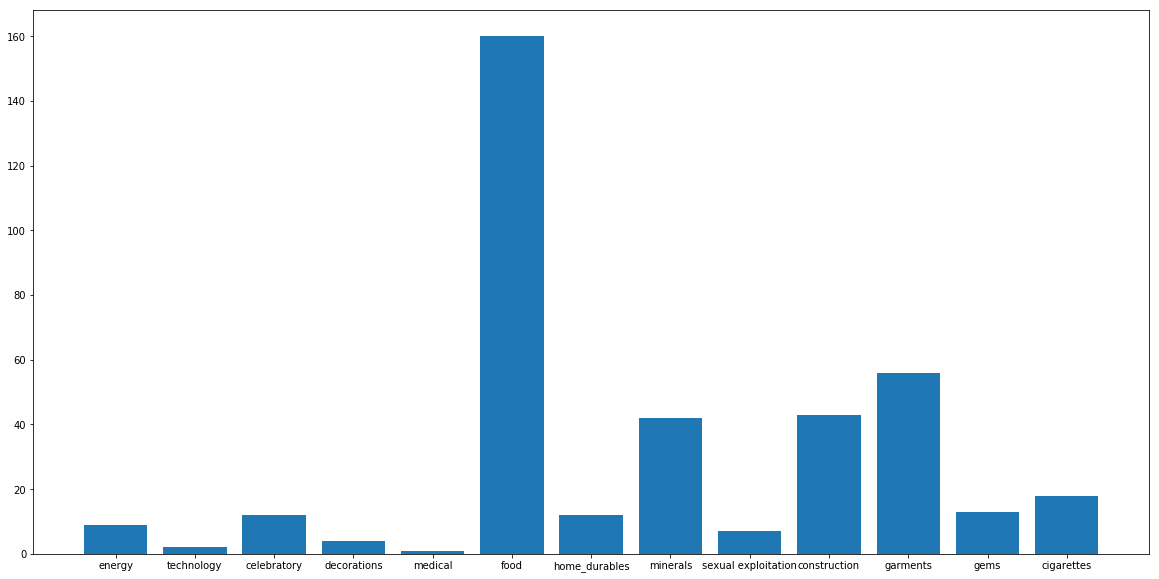

In [41]:
industry_counts = df["industry"].value_counts()
x_vals = list(set(df["industry"]))
y_vals = [industry_counts[elem] for elem in x_vals]
pos = list(range(len(x_vals)))
plt.bar(pos, y_vals, align="center")
plt.xticks(pos, x_vals)
plt.show()

# What is the effect of number of goods which employ forced labor on GDP?

In [56]:
countries = set(df["Country"])
num_industries = []
for country in countries:
    tmp = df[df["Country"] == country]
    num_industries.append((country, len(tmp)))
df["num_goods"] = np.nan
for index in df.index:
    for industry in num_industries:
        if df.ix[index]["Country"] == industry[0]:
            df.at[index, "num_goods"] = industry[1]
            

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [57]:
df.head()

Country               Good Child Labor Forced Labor      industry  \
0  Afghanistan             Bricks           X            X  construction   
1  Afghanistan            Carpets           X          NaN      garments   
2  Afghanistan               Coal           X          NaN        energy   
3  Afghanistan  Flowers (poppies)           X          NaN   decorations   
4       Angola           Diamonds           X            X          gems   

   num_goods  
0        4.0  
1        4.0  
2        4.0  
3        4.0  
4        1.0

In [6]:
new_gdp = pd.DataFrame()
new_df = pd.DataFrame()
gdp["Country"] = gdp["countries"]
for country in set(gdp["Country"]):
    if country in list(df["Country"]):
        new_gdp = new_gdp.append(gdp[gdp["Country"] == country])
for country in set(df["Country"]):
    if country in list(new_gdp["Country"]):
        tmp = df[df["Country"] == country]
        if not tmp.empty:
            new_df = new_df.append(tmp.iloc[0])
len(new_gdp), len(new_df)
new_gdp = new_gdp.sort_values("Country")
new_df = new_df.sort_values("Country")
new_gdp.index = list(range(len(new_gdp)))
new_df.index = list(range(len(new_df)))


In [7]:
from scipy import stats
print(stats.spearmanr(new_gdp["2016"], new_df["num_goods"]))
print(stats.spearmanr(new_gdp["2017"], new_df["num_goods"]))

SpearmanrResult(correlation=0.49778002485163997, pvalue=1.3498952292651301e-05)
SpearmanrResult(correlation=0.49765061609527217, pvalue=1.3579795834469717e-05)


# Looking at 2016

In [8]:
industry_model = sm.OLS(new_gdp["2016"], new_df["num_goods"])
result = industry_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2016   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     13.48
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           0.000475
Time:                        07:20:18   Log-Likelihood:                -593.50
No. Observations:                  69   AIC:                             1189.
Df Residuals:                      68   BIC:                             1191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_goods     87.3510     23.790      3.672      0.000      39.878     134.824
==============================================================================
Omnibus:                      140.809   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9191.540
Skew:                           7.233   Prob(JB):                         0.00
Kurtosis:                      57.661   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(new_df["num_goods"], 
                                                                    new_gdp["2016"], 
                                                                    test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [10]:
from sklearn import tree
from sklearn import metrics
import math
dtree = tree.DecisionTreeRegressor()
dtree_model = dtree.fit(X_train, y_train)
predictions = dtree_model.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

RMSE Results 1262.7925591605995


In [11]:
from sklearn import ensemble

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 17, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

setting = {'learning_rate': 0.1, 'subsample': 1.0}
params = dict(original_params)
params.update(setting)

gbr = ensemble.GradientBoostingRegressor(**params)
gbr_tree = tree.DecisionTreeRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

output = gbr.predict(X_train)
gbr_tree_model = gbr_tree.fit(X_train, output)


RMSE Results 1262.7925591605986


In [12]:
from sklearn import svm

svr = svm.SVR()
svr_tree = tree.DecisionTreeRegressor()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

output = svr.predict(X_train)
svr_tree_model = svr_tree.fit(X_train, output)

RMSE Results 95.54703493652225


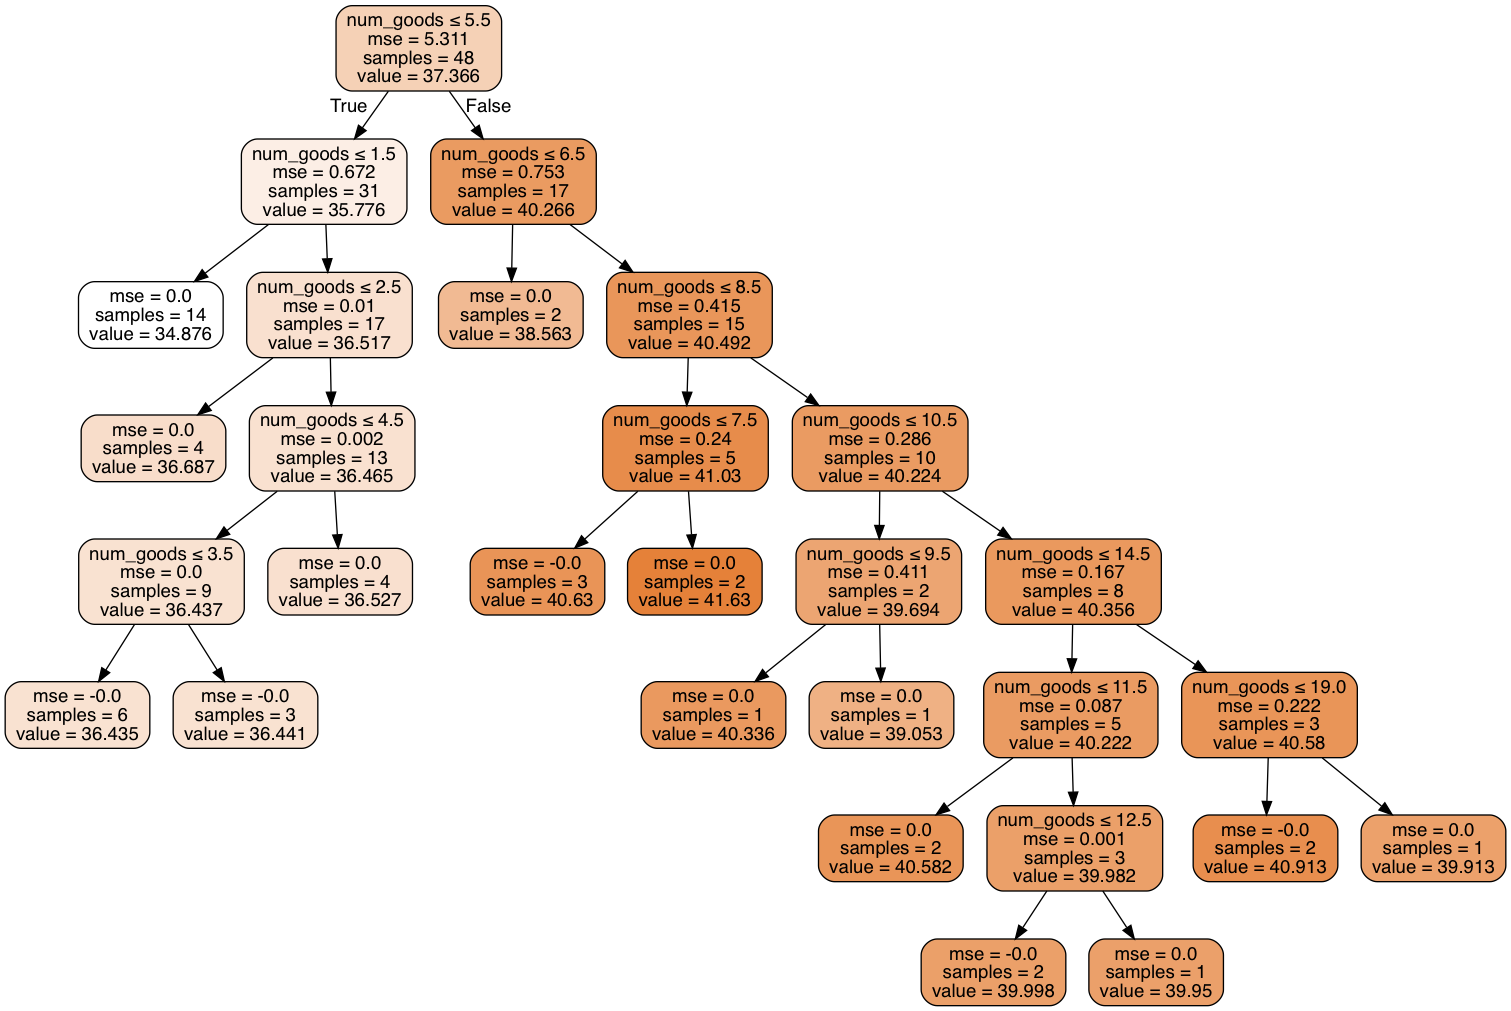

In [13]:
dot_data = tree.export_graphviz(svr_tree_model, out_file=None, 
                         feature_names=["num_goods"],  
                         class_names="GDP",  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
picture = Image(graph.create_png())

picture


# Looking At 2017

In [14]:
industry_model = sm.OLS(new_gdp["2017"], new_df["num_goods"])
result = industry_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2017   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     13.47
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           0.000477
Time:                        07:20:47   Log-Likelihood:                -599.19
No. Observations:                  69   AIC:                             1200.
Df Residuals:                      68   BIC:                             1203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_goods     94.8349     25.836      3.671      0.000      43.280     146.390
==============================================================================
Omnibus:                      140.623   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9132.010
Skew:                           7.217   Prob(JB):                         0.00
Kurtosis:                      57.479   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(new_df["num_goods"], 
                                                                    new_gdp["2017"], 
                                                                    test_size=0.3, random_state=42)
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys


In [16]:
from sklearn import tree
from sklearn import metrics
import math
dtree = tree.DecisionTreeRegressor()
dtree_model = dtree.fit(X_train, y_train)
predictions = dtree_model.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

RMSE Results 1370.1203185807326


In [17]:
from sklearn import ensemble

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 17, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

setting = {'learning_rate': 0.1, 'subsample': 1.0}
params = dict(original_params)
params.update(setting)

gbr = ensemble.GradientBoostingRegressor(**params)
gbr_tree = tree.DecisionTreeRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

output = gbr.predict(X_train)
gbr_tree_model = gbr_tree.fit(X_train, output)


RMSE Results 1370.1203185807315


In [18]:
from sklearn import svm

svr = svm.SVR()
svr_tree = tree.DecisionTreeRegressor()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

output = svr.predict(X_train)
svr_tree_model = svr_tree.fit(X_train, output)

RMSE Results 97.23724610844815


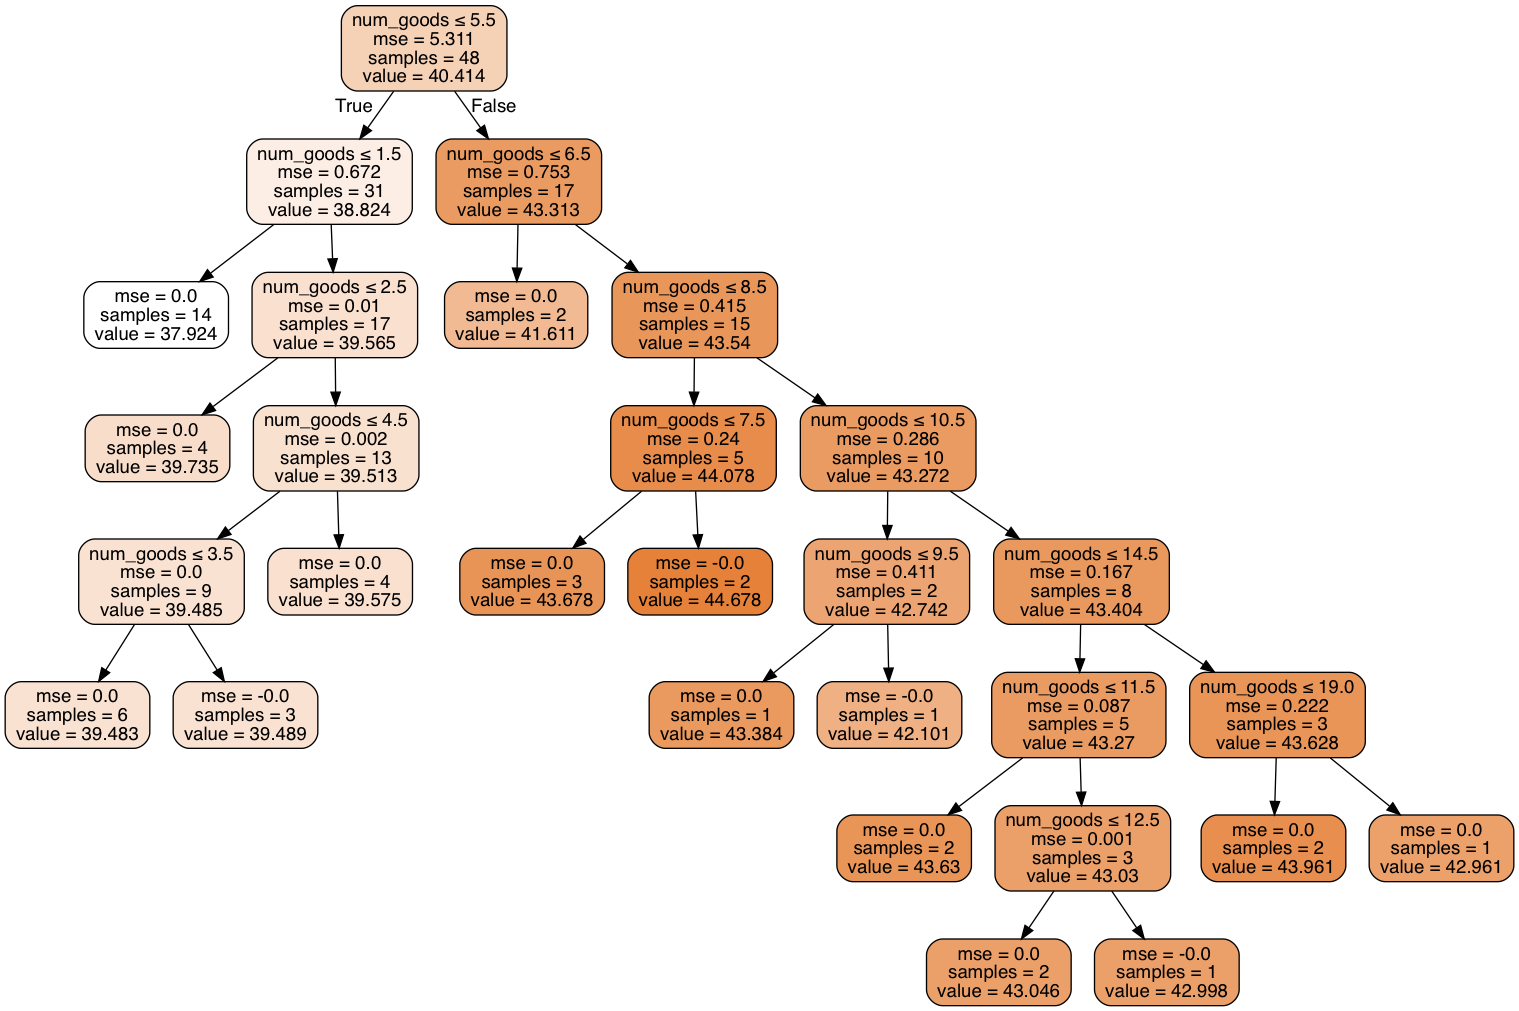

In [19]:
dot_data = tree.export_graphviz(svr_tree_model, out_file=None, 
                         feature_names=["num_goods"],  
                         class_names="GDP",  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
picture = Image(graph.create_png())

picture


# Building a multidimensional analysis

## Feature Engineering

### Exogenous Variables

* number of goods
* number of industries
* number produced by children
* number produced by adults
* industry (series of booleans)
* country continent

## Endogenous Variable

* GDP

In [39]:
df.head()

Country               Good Child Labor Forced Labor  num_goods  \
0  Afghanistan             Bricks           X            X        4.0   
1  Afghanistan            Carpets           X          NaN        4.0   
2  Afghanistan               Coal           X          NaN        4.0   
3  Afghanistan  Flowers (poppies)           X          NaN        4.0   
4       Angola           Diamonds           X            X        1.0   

       industry  
0  construction  
1      garments  
2        energy  
3   decorations  
4          gems

In [58]:
df = pd.merge(df, child_labor, on="Country")

In [59]:
df.head()

Country               Good Child Labor Forced Labor      industry  \
0  Afghanistan             Bricks           X            X  construction   
1  Afghanistan            Carpets           X          NaN      garments   
2  Afghanistan               Coal           X          NaN        energy   
3  Afghanistan  Flowers (poppies)           X          NaN   decorations   
4       Angola           Diamonds           X            X          gems   

   num_goods  num_child_produced  
0        4.0                 4.0  
1        4.0                 4.0  
2        4.0                 4.0  
3        4.0                 4.0  
4        1.0                 1.0

In [60]:
df = pd.merge(df, forced_labor, on="Country")

In [61]:
df.head()

Country               Good Child Labor Forced Labor      industry  \
0  Afghanistan             Bricks           X            X  construction   
1  Afghanistan            Carpets           X          NaN      garments   
2  Afghanistan               Coal           X          NaN        energy   
3  Afghanistan  Flowers (poppies)           X          NaN   decorations   
4       Angola           Diamonds           X            X          gems   

   num_goods  num_child_produced  num_forced_produced  
0        4.0                 4.0                  1.0  
1        4.0                 4.0                  1.0  
2        4.0                 4.0                  1.0  
3        4.0                 4.0                  1.0  
4        1.0                 1.0                  1.0

In [70]:
industries = pd.get_dummies(df["industry"])
industries["Country"] = df["Country"]
df = pd.merge(df, industries, on="Country")
df.head()

Country     Good Child Labor Forced Labor      industry  num_goods  \
0  Afghanistan   Bricks           X            X  construction        4.0   
1  Afghanistan   Bricks           X            X  construction        4.0   
2  Afghanistan   Bricks           X            X  construction        4.0   
3  Afghanistan   Bricks           X            X  construction        4.0   
4  Afghanistan  Carpets           X          NaN      garments        4.0   

   num_child_produced  num_forced_produced  celebratory  cigarettes  \
0                 4.0                  1.0            0           0   
1                 4.0                  1.0            0           0   
2                 4.0                  1.0            0           0   
3                 4.0                  1.0            0           0   
4                 4.0                  1.0            0           0   

      ...      decorations  energy  food  garments  gems  home_durables  \
0     ...                0       0     0         0     0              0   
1     ...                0       0     0         1     0              0   
2     ...                0       1     0         0     0              0   
3     ...                1       0     0         0     0              0   
4     ...                0       0     0         0     0              0   

   medical  minerals  sexual exploitation  technology  
0        0         0                    0           0  
1        0         0                    0           0  
2        0         0                    0           0  
3        0         0                    0           0  
4        0         0                    0           0  

[5 rows x 21 columns]

In [71]:
new_gdp = pd.DataFrame()
new_df = pd.DataFrame()
gdp["Country"] = gdp["countries"]
for country in set(gdp["Country"]):
    if country in list(df["Country"]):
        new_gdp = new_gdp.append(gdp[gdp["Country"] == country])
for country in set(df["Country"]):
    if country in list(new_gdp["Country"]):
        tmp = df[df["Country"] == country]
        if not tmp.empty:
            new_df = new_df.append(tmp.iloc[0])
len(new_gdp), len(new_df)
new_gdp = new_gdp.sort_values("Country")
new_df = new_df.sort_values("Country")
new_gdp.index = list(range(len(new_gdp)))
new_df.index = list(range(len(new_df)))


In [73]:
new_df.head()

Child Labor      Country Forced Labor                            Good  \
0           X  Afghanistan            X                          Bricks   
1           X       Angola            X                        Diamonds   
2           X    Argentina          NaN                     Blueberries   
3           X   Azerbaijan          NaN                          Cotton   
4           X   Bangladesh          NaN  Bidis (hand-rolled cigarettes)   

   celebratory  cigarettes  construction  decorations  energy  food  \
0          0.0         0.0           1.0          0.0     0.0   0.0   
1          0.0         0.0           0.0          0.0     0.0   0.0   
2          0.0         0.0           0.0          0.0     0.0   1.0   
3          0.0         0.0           0.0          0.0     0.0   0.0   
4          0.0         1.0           0.0          0.0     0.0   0.0   

      ...      gems  home_durables      industry medical  minerals  \
0     ...       0.0            0.0  construction     0.0       0.0   
1     ...       1.0            0.0          gems     0.0       0.0   
2     ...       0.0            0.0          food     0.0       0.0   
3     ...       0.0            0.0      garments     0.0       0.0   
4     ...       0.0            0.0    cigarettes     0.0       0.0   

   num_child_produced  num_forced_produced  num_goods  sexual exploitation  \
0                 4.0                  1.0        4.0                  0.0   
1                 1.0                  1.0        1.0                  0.0   
2                11.0                  1.0       11.0                  0.0   
3                 1.0                  0.0        1.0                  0.0   
4                15.0                  1.0       15.0                  0.0   

   technology  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  

[5 rows x 21 columns]

In [74]:
new_df.drop("Good", axis=1, inplace=True)
new_df.drop("Country", axis=1, inplace=True)
new_df.drop("Child Labor", axis=1, inplace=True)
new_df.drop("Forced Labor", axis=1, inplace=True)
new_df.drop("industry", axis=1, inplace=True)

In [75]:
new_df.head()

celebratory  cigarettes  construction  decorations  energy  food  garments  \
0          0.0         0.0           1.0          0.0     0.0   0.0       0.0   
1          0.0         0.0           0.0          0.0     0.0   0.0       0.0   
2          0.0         0.0           0.0          0.0     0.0   1.0       0.0   
3          0.0         0.0           0.0          0.0     0.0   0.0       1.0   
4          0.0         1.0           0.0          0.0     0.0   0.0       0.0   

   gems  home_durables  medical  minerals  num_child_produced  \
0   0.0            0.0      0.0       0.0                 4.0   
1   1.0            0.0      0.0       0.0                 1.0   
2   0.0            0.0      0.0       0.0                11.0   
3   0.0            0.0      0.0       0.0                 1.0   
4   0.0            0.0      0.0       0.0                15.0   

   num_forced_produced  num_goods  sexual exploitation  technology  
0                  1.0        4.0                  0.0         0.0  
1                  1.0        1.0                  0.0         0.0  
2                  1.0       11.0                  0.0         0.0  
3                  0.0        1.0                  0.0         0.0  
4                  1.0       15.0                  0.0         0.0

In [76]:
multivariate_model = sm.OLS(new_gdp["2016"], new_df)
result = multivariate_model.fit()
result.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encounte

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2016   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     150.8
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.78e-38
Time:                        08:00:17   Log-Likelihood:                -476.73
No. Observations:                  69   AIC:                             979.5
Df Residuals:                      56   BIC:                             1009.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
celebratory                  0          0        nan        nan           0           0
cigarettes             -7.7370    200.552     -0.039      0.969    -409.491     394.016
construction         -418.2602    133.358     -3.136      0.003    -685.409    -151.111
decorations          9908.2714    465.177     21.300      0.000    8976.409    1.08e+04
energy                -70.0631    191.787     -0.365      0.716    -454.259     314.132
food                 -125.1826     63.879     -1.960      0.055    -253.148       2.782
garments             -136.4341     93.642     -1.457      0.151    -324.022      51.153
gems                  -78.9540    135.494     -0.583      0.562    -350.380     192.472
home_durables       -9.636e-13   5.99e-14    -16.077      0.000   -1.08e-12   -8.44e-13
medical              -1.97e-12   1.37e-13    -14.335      0.000   -2.25e-12   -1.69e-12
minerals             -168.5247    138.648     -1.215      0.229    -446.269     109.220
num_child_produced      8.7003     78.633      0.111      0.912    -148.821     166.222
num_forced_produced    87.5616     32.445      2.699      0.009      22.566     152.557
num_goods              38.9973     78.480      0.497      0.621    -118.218     196.212
sexual exploitation  1132.4947    270.698      4.184      0.000     590.221    1674.768
technology            -85.6291    296.855     -0.288      0.774    -680.301     509.042
==============================================================================
Omnibus:                       10.965   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               21.323
Skew:                           0.431   Prob(JB):                     2.34e-05
Kurtosis:                       5.583   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
X = new_df[["construction", 
            "decorations",  
            "food", 
            "home_durables", 
            "medical",  
            "num_child_produced", 
            "num_forced_produced", 
            "sexual exploitation"]]
multivariate_model = sm.OLS(new_gdp["2016"], X)
result = multivariate_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   2016   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     333.4
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           9.55e-46
Time:                        08:07:00   Log-Likelihood:                -479.37
No. Observations:                  69   AIC:                             970.7
Df Residuals:                      63   BIC:                             984.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
construction         -389.2090    121.872     -3.194      0.002    -632.750    -145.668
decorations          1.018e+04    357.732     28.445      0.000    9460.959    1.09e+04
food                 -102.1641     55.470     -1.842      0.070    -213.012       8.684
home_durables        2.881e-13   1.58e-14     18.238      0.000    2.57e-13     3.2e-13
medical              2.305e-12   8.76e-14     26.293      0.000    2.13e-12    2.48e-12
num_child_produced     45.2133      8.199      5.515      0.000      28.829      61.597
num_forced_produced    85.8644     23.985      3.580      0.001      37.935     133.794
sexual exploitation  1136.6763    264.309      4.301      0.000     608.497    1664.855
==============================================================================
Omnibus:                       21.963   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.660
Skew:                           1.028   Prob(JB):                     1.22e-10
Kurtosis:                       6.414   Cond. No.                     1.27e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.82e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [84]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(new_df, 
                                                                    new_gdp["2016"], 
                                                                    test_size=0.3, random_state=42)


In [85]:
from sklearn import tree
from sklearn import metrics
import math
dtree = tree.DecisionTreeRegressor()
dtree_model = dtree.fit(X_train, y_train)
predictions = dtree_model.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

RMSE Results 559.0951715649901


In [86]:
from sklearn import ensemble

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 17, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

setting = {'learning_rate': 0.1, 'subsample': 1.0}
params = dict(original_params)
params.update(setting)

gbr = ensemble.GradientBoostingRegressor(**params)
gbr_tree = tree.DecisionTreeRegressor()
gbr.fit(X_train, y_train)
predictions = gbr.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

output = gbr.predict(X_train)
gbr_tree_model = gbr_tree.fit(X_train, output)


RMSE Results 258.581464217724


In [87]:
from sklearn import svm

svr = svm.SVR()
svr_tree = tree.DecisionTreeRegressor()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

output = svr.predict(X_train)
svr_tree_model = svr_tree.fit(X_train, output)

RMSE Results 95.05449020038813


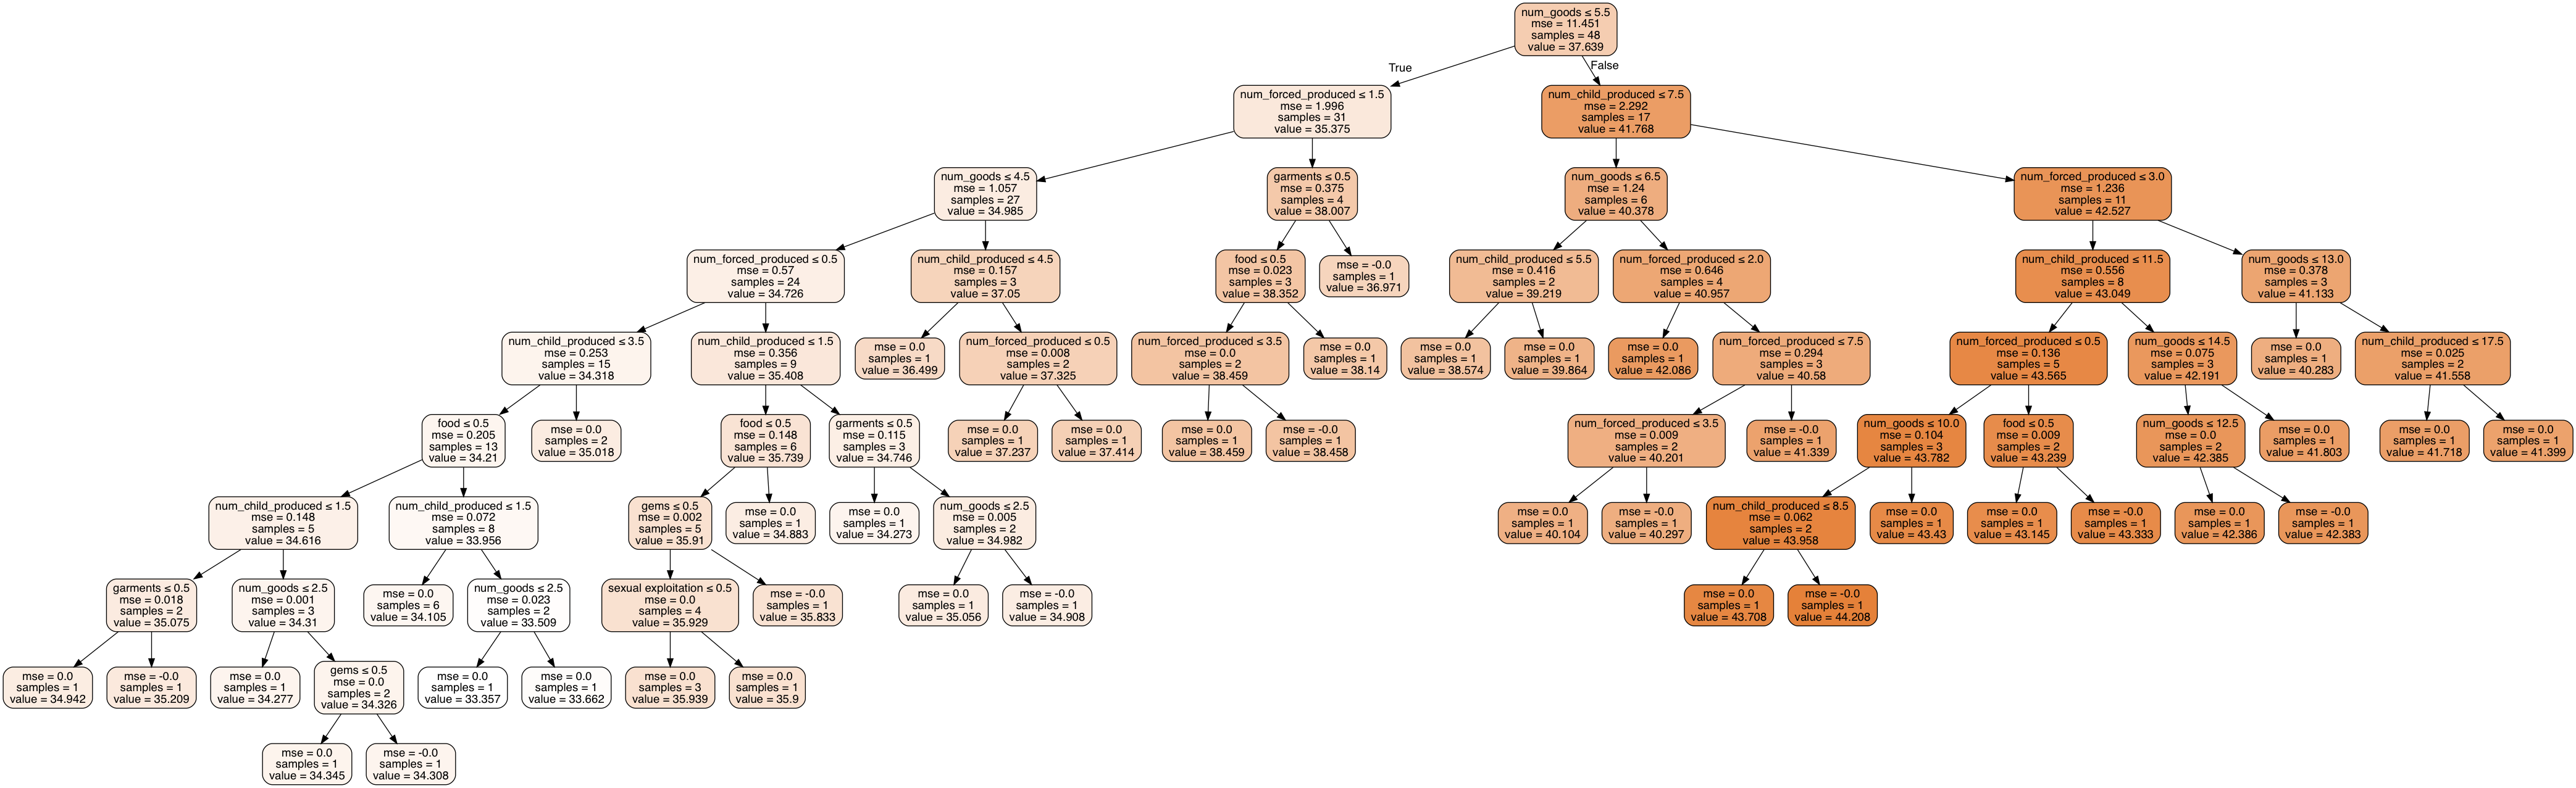

In [89]:
dot_data = tree.export_graphviz(svr_tree_model, out_file=None, 
                         feature_names=new_df.columns,  
                         class_names="GDP",  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
picture = Image(graph.create_png())

picture


In [95]:
new_df.columns
for feature in range(len(svr_tree_model.feature_importances_)):
    print(new_df.columns[feature], svr_tree_model.feature_importances_[feature])

celebratory 0.0
cigarettes 0.0
construction 0.0
decorations 0.0
energy 0.0
food 0.00419141717128
garments 0.00327851665108
gems 1.47219131605e-05
home_durables 0.0
medical 0.0
minerals 0.0
num_child_produced 0.0496288734727
num_forced_produced 0.090002583873
num_goods 0.852881799328
sexual exploitation 2.08759075627e-06
technology 0.0


In [97]:
X = new_df[["num_forced_produced", "num_goods"]]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    new_gdp["2016"], 
                                                                    test_size=0.3, random_state=42)


In [98]:
svr = svm.SVR()
svr_tree = tree.DecisionTreeRegressor()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)
print("RMSE Results", math.sqrt(metrics.mean_squared_error(y_test.values, predictions)))

output = svr.predict(X_train)
svr_tree_model = svr_tree.fit(X_train, output)

RMSE Results 95.1672042079478


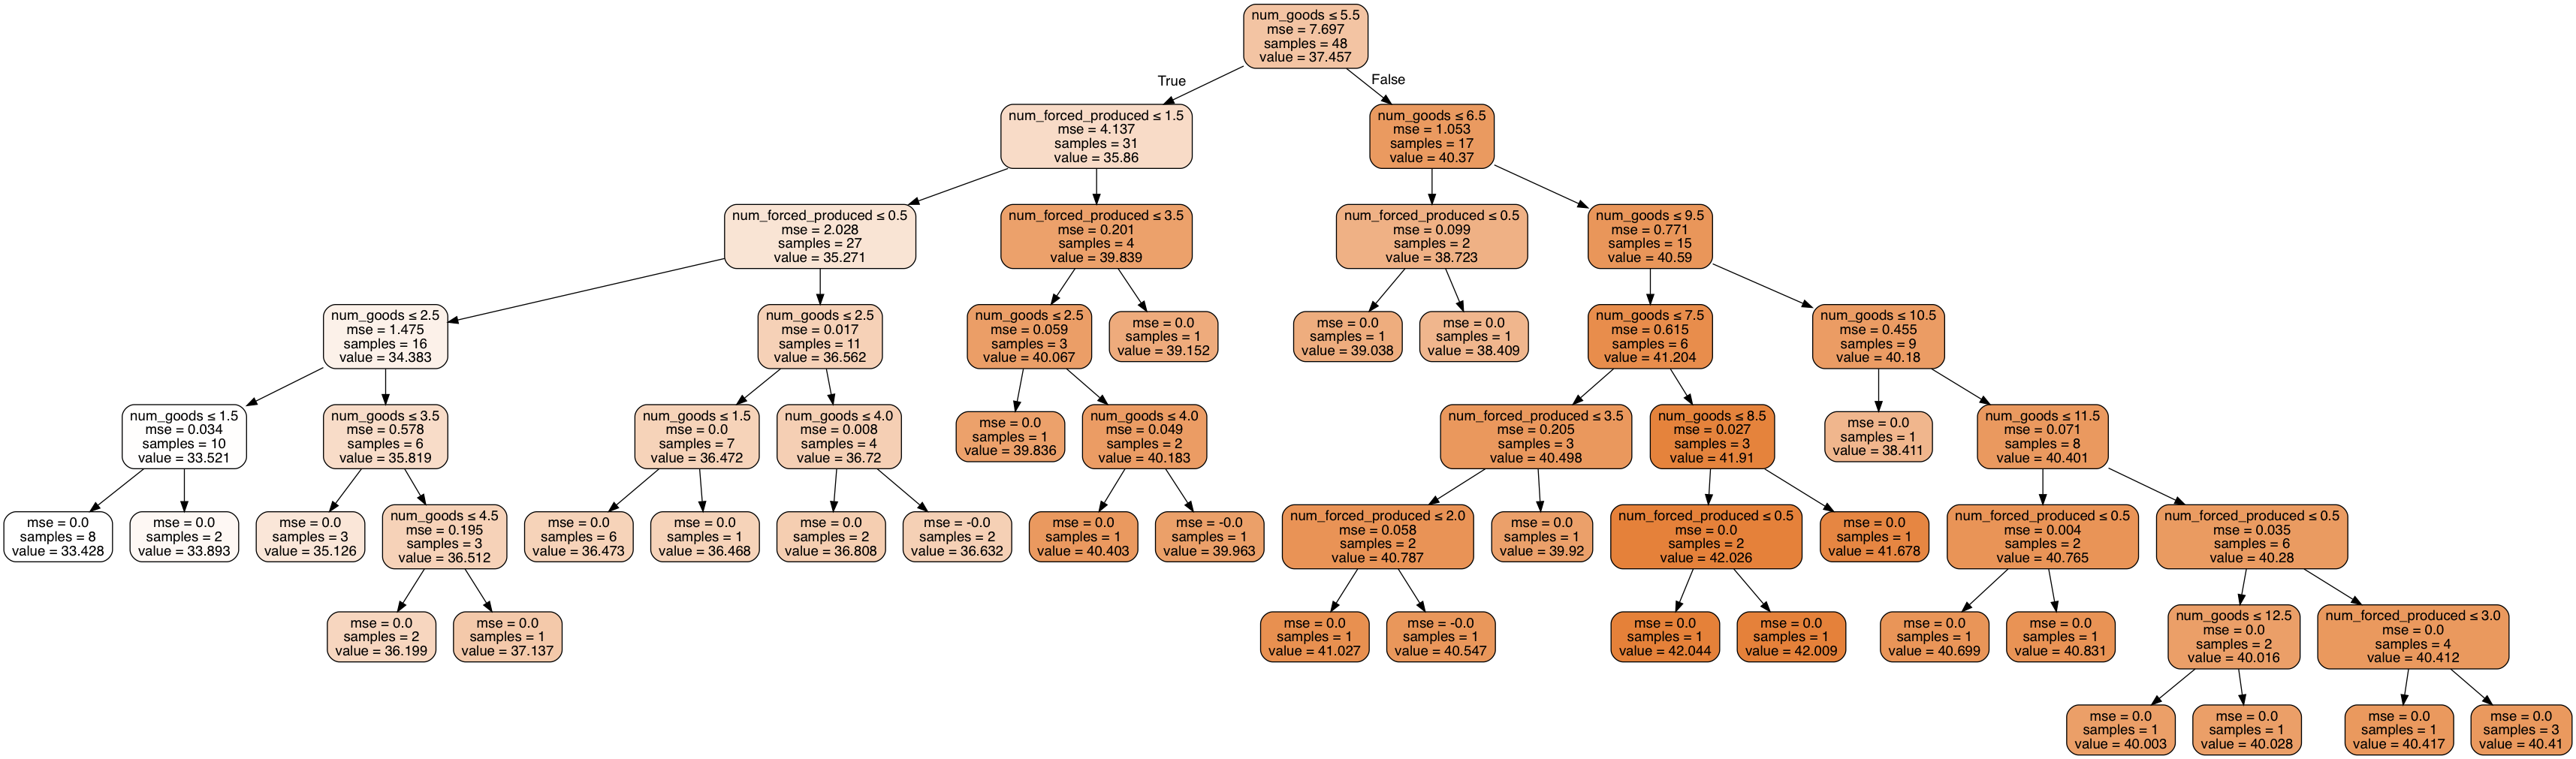

In [99]:
dot_data = tree.export_graphviz(svr_tree_model, out_file=None, 
                         feature_names=X.columns,  
                         class_names="GDP",  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
picture = Image(graph.create_png())

picture
